In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

from data_loader import create_data_loader

In [2]:
label_files = ["../../RatSI_v1.01/annotations/Observation{:02d}.csv".format(i) for i in range(1, 10)]
df = pd.concat([pd.read_csv(f, sep=";", index_col=0) for f in label_files], axis=0, ignore_index=True)

In [3]:
df["label"] = np.where(df.action == "Solitary", 0, 1)

In [15]:
counts_train = pd.value_counts(df.label[(len(df) // 2):])
counts_valid = pd.value_counts(df.label[:(len(df) // 2)])
print(counts_train)
print(counts_valid)

0    55409
1    45859
Name: label, dtype: int64
0    64257
1    37010
Name: label, dtype: int64


In [ ]:
tfrecord_file = "ratsi_data.tfrecord"
metadata_file = "ratsi_data.metadata.json"
dataset_train, dataset_valid = create_data_loader(
    tfrecord_file,
    metadata_file,
    valid_size=0.5,
    batch_size=1,
)

itr = dataset_train.as_numpy_iterator()

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

for i in range(10*25):
    fig = plt.figure(frameon=False)
    fig.set_size_inches(5,5)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    img, label = next(itr)
    img = ax.imshow(img[0, ...] / 255., cmap="Greys_r", aspect="auto")
    ax.text(10, 15, "Interacting" if label else "Solitary", bbox=bbox_props, size=14)
    fig.savefig("sample_annot{:03d}.png".format(i), dpi=200)
    
os.system("convert -delay 4 -loop 0 sample_annot*.png sample_annot.gif")
files = glob.glob("./sample_annot*.png")
for f in files:
    try:
        os.remove(f)
    except:
        pass

In [82]:
df.label

0         0
1         0
2         0
3         0
4         0
         ..
202530    1
202531    1
202532    1
202533    1
202534    1
Name: label, Length: 202535, dtype: int64

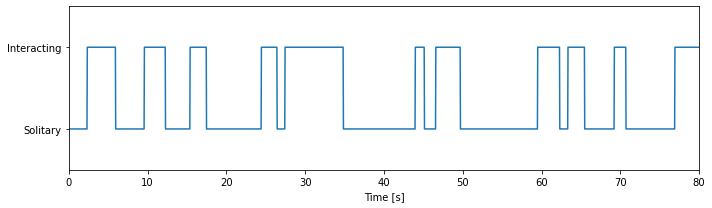

In [100]:
plt.figure(figsize=(10,3))
plt.plot(np.linspace(0, 2000 / 25, 2000), df.label.iloc[:2000])
plt.xlabel("Time [s]")
plt.yticks([0, 1], ["Solitary", "Interacting"])
plt.ylim(-0.5, 1.5)
plt.xlim(0, 80)
plt.tight_layout()
plt.savefig("sample-label-hist.png", dpi=500)